In [1]:
!pip install yfinance
import yfinance as yahooFinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293632 sha256=dbe2dd50dc96eff773f3850824cc133882df7c8f4ccd6574205617dae499822a
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "MBG.DE"
mercedes_data = yahooFinance.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
mercedes_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,28.179604,28.221191,27.381126,27.630650,10.301306,5596229
2004-08-20,27.472618,27.838587,27.297951,27.680555,10.319910,4680958
2004-08-23,27.988302,28.279413,27.805317,28.146334,10.493565,3711880
2004-08-24,28.146334,28.678652,28.079794,28.246143,10.530777,4830906
2004-08-25,28.512302,28.612112,28.246143,28.362589,10.574187,3222824


In [5]:
mercedes_data.shape

(5091, 6)

In [6]:
mercedes_data.describe ()

,Open,High,Low,Close,Adj Close,Volume
count,5091.000000,5091.000000,5091.000000,5091.000000,5091.000000,5.091000e+03
mean,46.210451,46.738028,45.632232,46.194912,29.000150,6.105561e+06
std,14.444169,14.521977,14.346446,14.437215,15.630110,4.313857e+06
min,14.688660,15.108692,14.306056,14.505675,6.404110,0.000000e+00
25%,34.184818,34.606932,33.737757,34.263836,15.643690,3.450520e+06
50%,44.972584,45.521538,44.431950,45.005856,27.170944,5.069090e+06
75%,57.567621,58.065462,56.924797,57.530985,37.119583,7.453570e+06
max,78.949471,79.905975,77.577087,79.673088,71.070671,7.396760e+07


In [7]:
mercedes_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Mercedes data")

In [9]:
mercedes_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

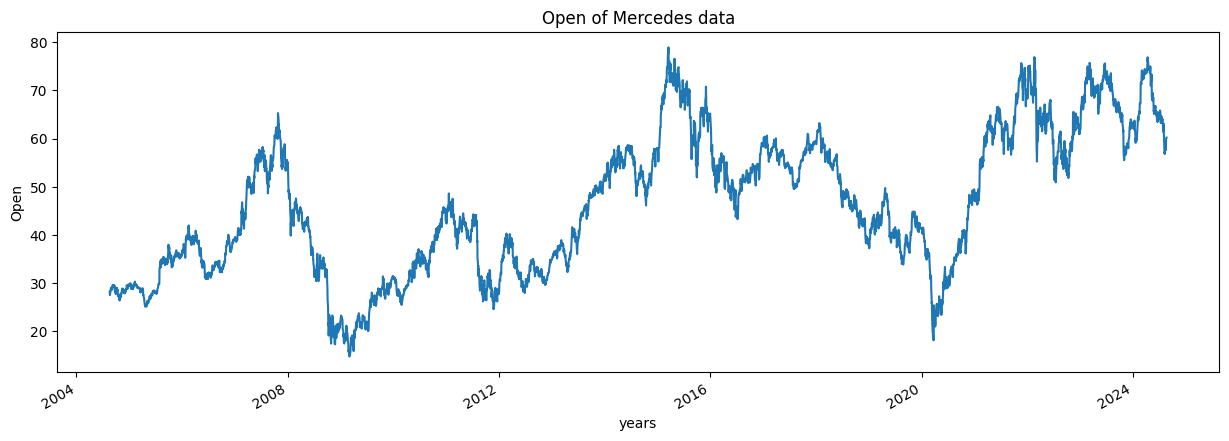

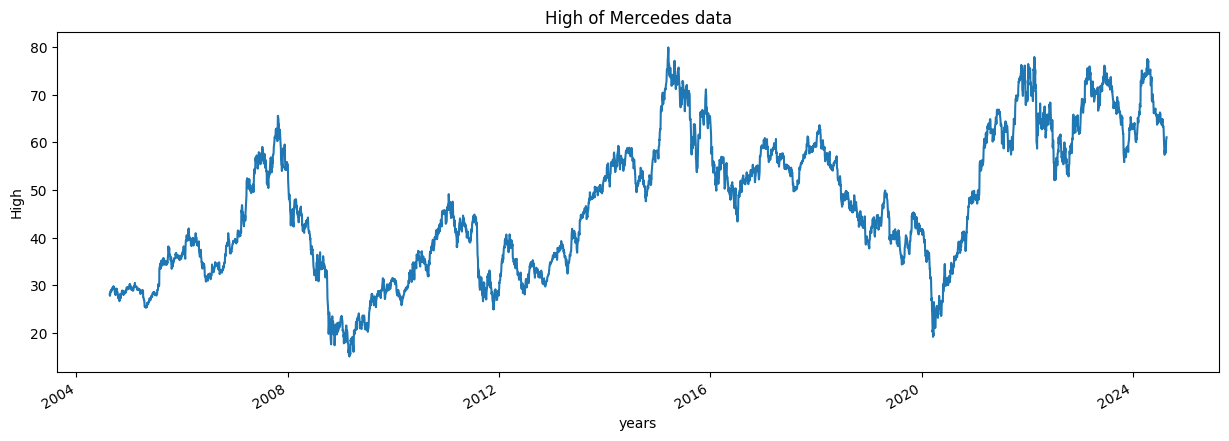

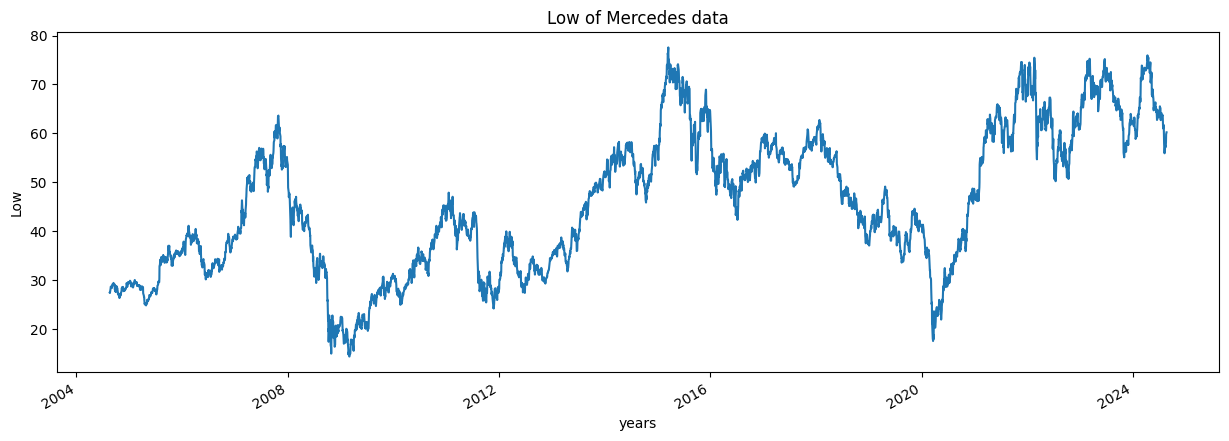

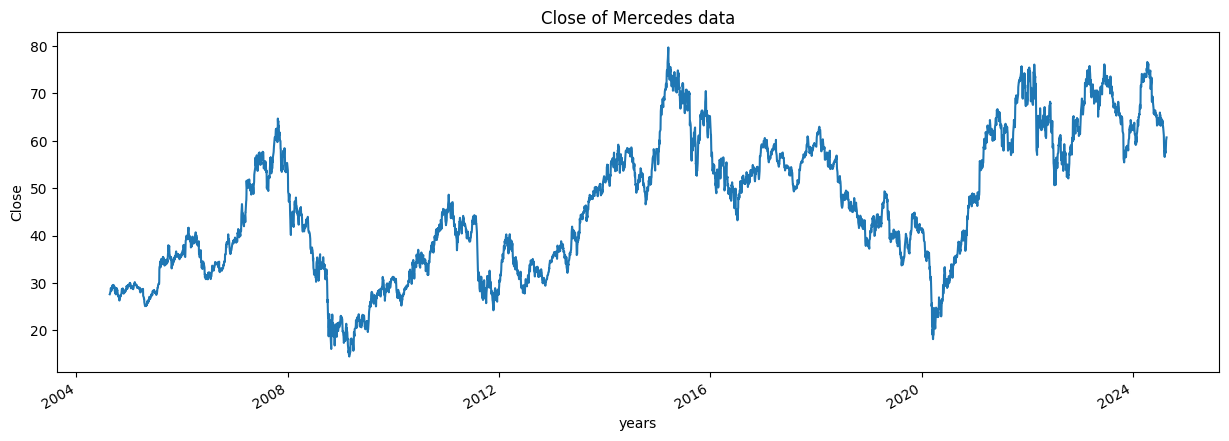

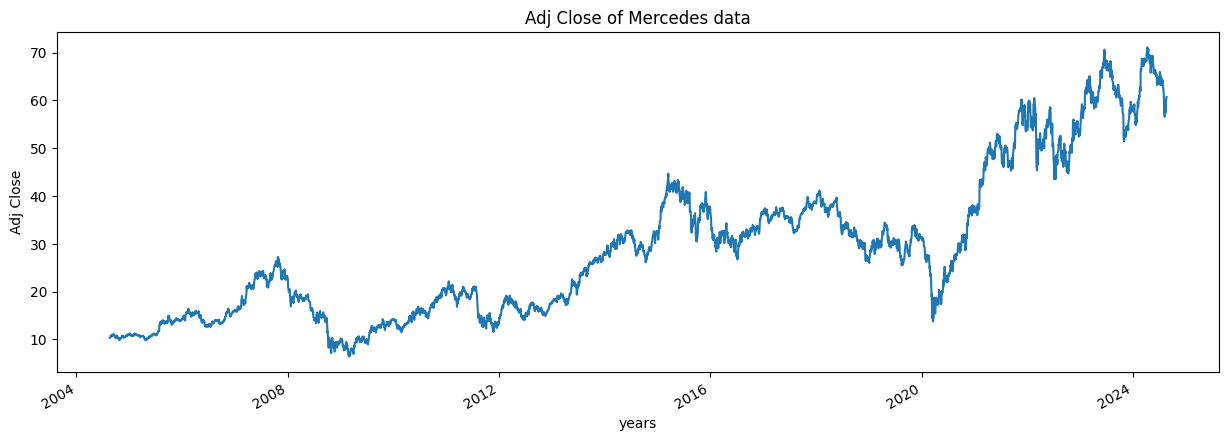

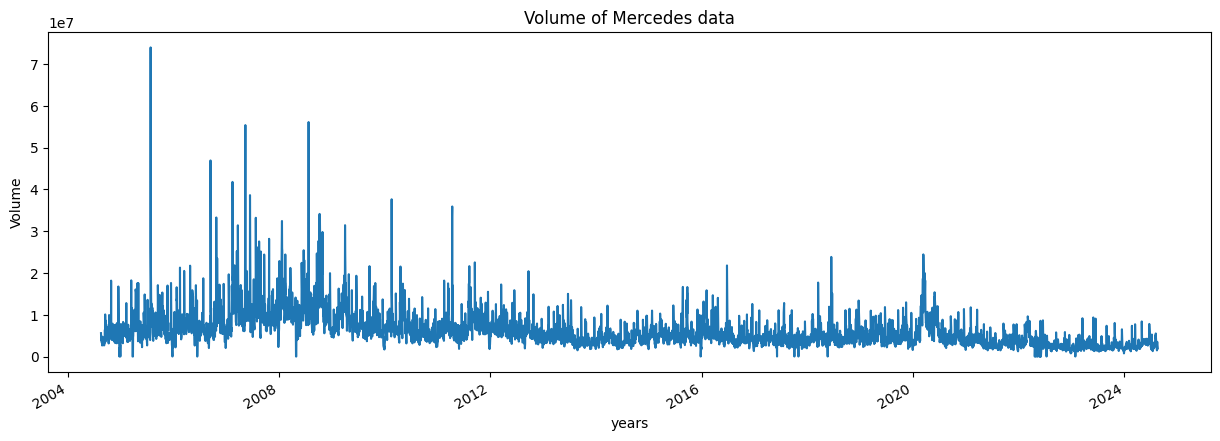

In [10]:
for column in mercedes_data.columns:
    plot_graph((15,5),mercedes_data[column], column)

In [11]:
for i in range(2004,2025):
    print(i,list(mercedes_data.index.year).count(i))

2004 97
2005 260
2006 255
2007 252
2008 254
2009 254
2010 256
2011 256
2012 253
2013 252
2014 252
2015 254
2016 255
2017 255
2018 252
2019 251
2020 254
2021 255
2022 257
2023 255
2024 162


In [12]:
mercedes_data['MA_for_100_days'] = mercedes_data['Adj Close'].rolling(100).mean()
mercedes_data['MA_for_150_days'] = mercedes_data['Adj Close'].rolling(150).mean()
mercedes_data['MA_for_200_days'] = mercedes_data['Adj Close'].rolling(200).mean()
mercedes_data['MA_for_250_days'] = mercedes_data['Adj Close'].rolling(250).mean()


<Figure size 640x480 with 0 Axes>

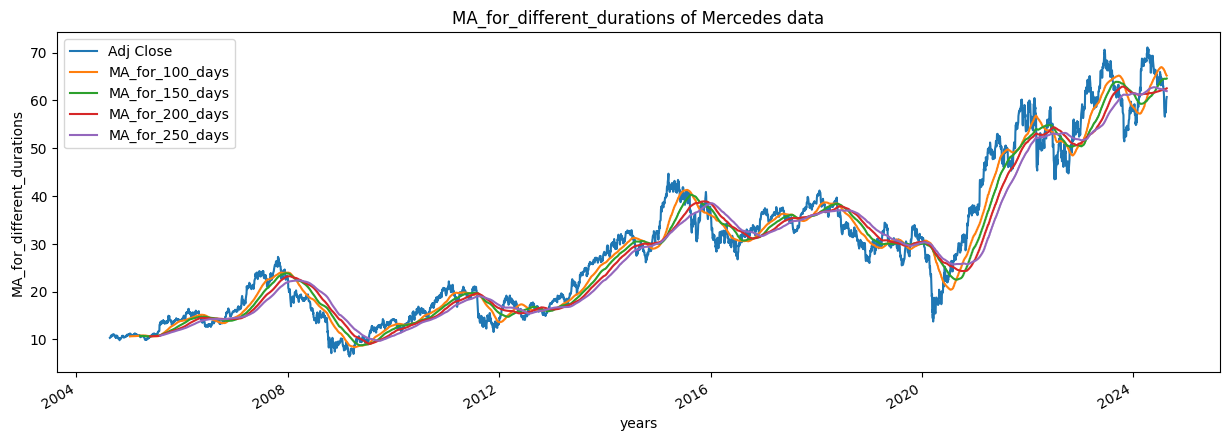

In [13]:
plot_graph((15,5), mercedes_data[['Adj Close','MA_for_100_days','MA_for_150_days','MA_for_200_days','MA_for_250_days']], 'MA_for_different_durations')

In [14]:
Adj_close_price = mercedes_data[['Adj Close']]

In [15]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([71.07067108]), array([6.40411043]))

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.06026601],
       [0.0605537 ],
       [0.06323909],
       ...,
       [0.82246356],
       [0.83019553],
       [0.83962855]])

In [17]:
len(scaled_data)

5091

In [18]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)
x_data[0],y_data[0]

(array([[0.06026601],
        [0.0605537 ],
        [0.06323909],
        [0.06381454],
        [0.06448583],
        [0.06765073],
        [0.06765073],
        [0.0658765 ],
        [0.06467765],
        [0.06678757],
        [0.06702735],
        [0.06899339],
        [0.07095948],
        [0.07038405],
        [0.0696168 ],
        [0.06789053],
        [0.06894548],
        [0.07167875],
        [0.07091149],
        [0.06904138],
        [0.07043197],
        [0.07076766],
        [0.06913729],
        [0.069425  ],
        [0.0652531 ],
        [0.06400631],
        [0.06352678],
        [0.06165664],
        [0.06141689],
        [0.06189639],
        [0.0601701 ],
        [0.06482151],
        [0.06779459],
        [0.0671712 ],
        [0.06726709],
        [0.06597241],
        [0.06429404],
        [0.0655888 ],
        [0.062328  ],
        [0.06184845],
        [0.05901923],
        [0.05882747],
        [0.05729296],
        [0.05868361],
        [0.05710112],
        [0

In [19]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3493, 100, 1)
(3493, 1)
(1498, 100, 1)
(1498, 1)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2024-08-19 21:06:42.001849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 21:06:42.002091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 21:06:42.193197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 258s 73ms/step - loss: 1.6207e-04


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [25]:
predictions = model.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step


array([[0.40513128],
       [0.40528378],
       [0.41375893],
       ...,
       [0.83169645],
       [0.8541125 ],
       [0.8603485 ]], dtype=float32)

In [26]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[32.60256],
       [32.61242],
       [33.16048],
       ...,
       [60.18706],
       [61.63663],
       [62.03989]], dtype=float32)

In [27]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[31.80158424],
       [32.24238586],
       [31.52317619],
       ...,
       [59.59000015],
       [60.09000015],
       [60.70000076]])

In [28]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

1.581095637000578

In [29]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = mercedes_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-09-26,31.801584,32.602558
2018-09-27,32.242386,32.612419
2018-09-28,31.523176,33.160480
2018-10-01,31.830582,32.551250
2018-10-02,32.480183,32.780605


<Figure size 640x480 with 0 Axes>

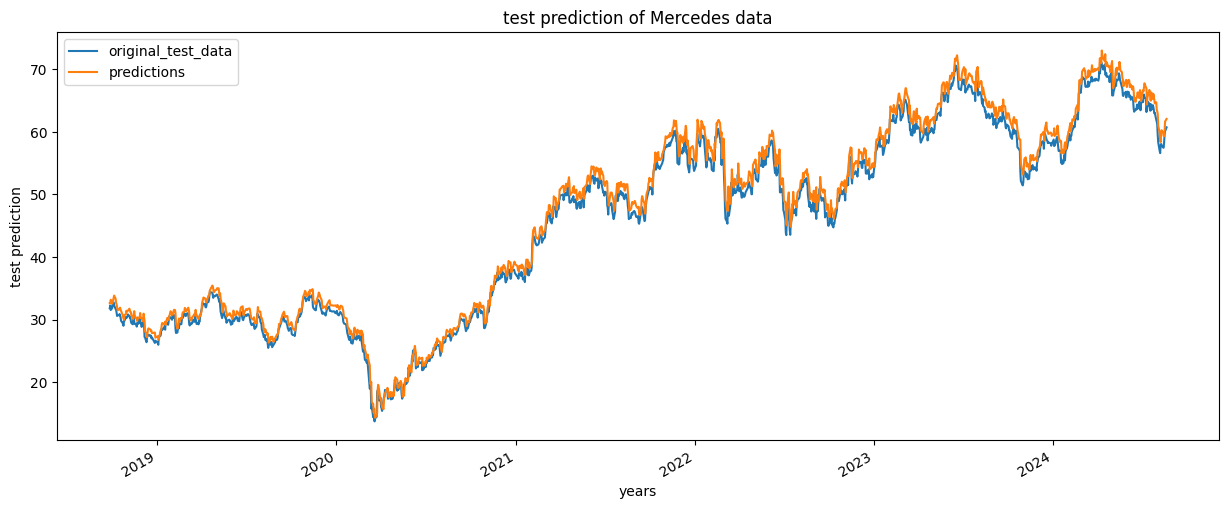

In [30]:
plot_graph((15,6), ploting_data, 'test prediction')

<Figure size 640x480 with 0 Axes>

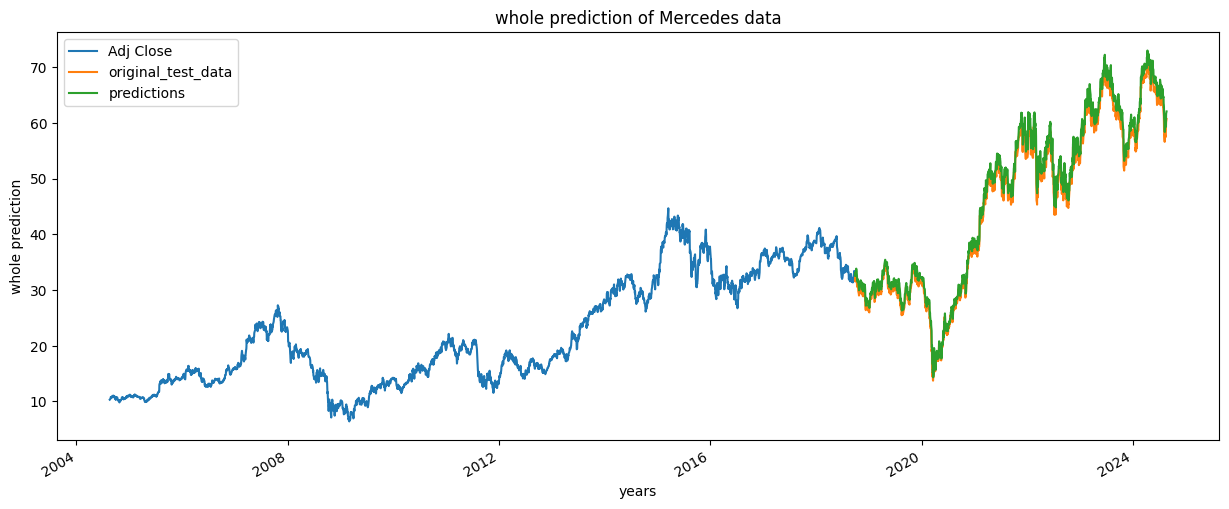

In [31]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole prediction')

In [32]:
model.save("Latest_stock_price_model.keras")